Example code for direct access of cloud-hosted ICESat-2 ATL14 and ATL15 Gridded Land Ice Height Change

Code was created on CryoCloud cloud-computing JupyterHub using a 2 GB server. Learn more: https://cryointhecloud.com/.

Written 2025-03-31 by Wilson Sauthoff (wsauthoff.github.io)

In [1]:
# Import libraries
import earthaccess
from functools import partial
import logging
import matplotlib.pyplot as plt
import os
import xarray as xr

# Greenland

## ATL15

In [2]:
# Find ICESat-2 ATL15 data granules
results = earthaccess.search_data(
    short_name='ATL15',
    cloud_hosted=True,
    bounding_box=(-73, 60, -12, 84),  # (lower_left_lon, lower_left_lat, upper_right_lon, upper_right_lat)
)

In [3]:
# Open data granules as s3 files to stream
files = earthaccess.open(results)
files

QUEUEING TASKS | :   0%|          | 0/16 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/16 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/16 [00:00<?, ?it/s]

[<File-like object S3FileSystem, nsidc-cumulus-prod-protected/ATLAS/ATL15/004/ATL15_CS_0324_20km_004_03.nc>,
 <File-like object S3FileSystem, nsidc-cumulus-prod-protected/ATLAS/ATL15/004/ATL15_IS_0324_20km_004_03.nc>,
 <File-like object S3FileSystem, nsidc-cumulus-prod-protected/ATLAS/ATL15/004/ATL15_GL_0324_40km_004_03.nc>,
 <File-like object S3FileSystem, nsidc-cumulus-prod-protected/ATLAS/ATL15/004/ATL15_CN_0324_10km_004_03.nc>,
 <File-like object S3FileSystem, nsidc-cumulus-prod-protected/ATLAS/ATL15/004/ATL15_CS_0324_10km_004_03.nc>,
 <File-like object S3FileSystem, nsidc-cumulus-prod-protected/ATLAS/ATL15/004/ATL15_GL_0324_20km_004_03.nc>,
 <File-like object S3FileSystem, nsidc-cumulus-prod-protected/ATLAS/ATL15/004/ATL15_CN_0324_20km_004_03.nc>,
 <File-like object S3FileSystem, nsidc-cumulus-prod-protected/ATLAS/ATL15/004/ATL15_CN_0324_01km_004_03.nc>,
 <File-like object S3FileSystem, nsidc-cumulus-prod-protected/ATLAS/ATL15/004/ATL15_IS_0324_01km_004_03.nc>,
 <File-like object 

In [4]:
# Filter to 1-km resolution data sets
filtered_files = [f for f in files if '01km' in str(f)]

# Filter to Greenland (GL)
filtered_files = [f for f in filtered_files if 'GL' in str(f)]

# Delete intermediary objects for memory conservation
del results, files

# Sort alphabetically by the data set file name
filtered_files.sort(key=lambda x: str(x).split('/')[-1])

# Display filtered list
filtered_files

[<File-like object S3FileSystem, nsidc-cumulus-prod-protected/ATLAS/ATL15/004/ATL15_GL_0324_01km_004_03.nc>]

In [5]:
ATL15_GL = xr.open_dataset(filtered_files[0], group='delta_h')
ATL15_GL

<xarray.Dataset> Size: 2GB
Dimensions:              (x: 1541, y: 2741, time: 24)
Coordinates:
  * x                    (x) float64 12kB -6.7e+05 -6.69e+05 ... 8.7e+05
  * y                    (y) float64 22kB -3.35e+06 -3.349e+06 ... -6.1e+05
  * time                 (time) datetime64[ns] 192B 2019-01-01T06:00:00 ... 2...
Data variables:
    Polar_Stereographic  int8 1B ...
    ice_area             (time, y, x) float32 405MB ...
    delta_h              (time, y, x) float32 405MB ...
    delta_h_sigma        (time, y, x) float32 405MB ...
    data_count           (time, y, x) float32 405MB ...
    misfit_rms           (time, y, x) float32 405MB ...
    misfit_scaled_rms    (time, y, x) float32 405MB ...
Attributes:
    description:  delta_h group includes variables describing height differen...

## ATL14

In [6]:
# Log into NASA Earthdata to search for datasets
earthaccess.login()

# Find ICESat-2 ATL14 data granules
results = earthaccess.search_data(
    short_name='ATL14',
    cloud_hosted=True,
    bounding_box=(-73, 60, -12, 84),  # (lower_left_lon, lower_left_lat, upper_right_lon, upper_right_lat)
)

In [7]:
# Open data granules as s3 files to stream
files = earthaccess.open(results)
files

QUEUEING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/4 [00:00<?, ?it/s]

[<File-like object S3FileSystem, nsidc-cumulus-prod-protected/ATLAS/ATL14/004/ATL14_CN_0324_100m_004_03.nc>,
 <File-like object S3FileSystem, nsidc-cumulus-prod-protected/ATLAS/ATL14/004/ATL14_IS_0324_100m_004_03.nc>,
 <File-like object S3FileSystem, nsidc-cumulus-prod-protected/ATLAS/ATL14/004/ATL14_CS_0324_100m_004_03.nc>,
 <File-like object S3FileSystem, nsidc-cumulus-prod-protected/ATLAS/ATL14/004/ATL14_GL_0324_100m_004_03.nc>]

In [8]:
# Filter to Greenland (GL)
filtered_files = [f for f in files if 'GL' in str(f)]

# Delete intermediary objects for memory conservation
del results, files

# Display filtered list
filtered_files

[<File-like object S3FileSystem, nsidc-cumulus-prod-protected/ATLAS/ATL14/004/ATL14_GL_0324_100m_004_03.nc>]

In [9]:
ATL14_GL = xr.open_dataset(filtered_files[0])
ATL14_GL

<xarray.Dataset> Size: 10GB
Dimensions:              (x: 15401, y: 27401)
Coordinates:
  * x                    (x) float64 123kB -6.7e+05 -6.699e+05 ... 8.7e+05
  * y                    (y) float64 219kB -3.35e+06 -3.35e+06 ... -6.1e+05
Data variables:
    Polar_Stereographic  int8 1B ...
    ice_area             (y, x) float32 2GB ...
    h                    (y, x) float32 2GB ...
    h_sigma              (y, x) float32 2GB ...
    data_count           (y, x) float32 2GB ...
    misfit_rms           (y, x) float32 2GB ...
    misfit_scaled_rms    (y, x) float32 2GB ...
Attributes: (12/51)
    GDAL_AREA_OR_POINT:                 Area
    Conventions:                        CF-1.7
    short_name:                         ATL14
    level:                              L3B
    title:                              SET_BY_META
    description:                        This data set (ATL14) contains season...
    ...                                 ...
    processing_level:                   3B
    references:                         http://nsidc.org/data/icesat2/data.html
    project:                            ICESat-2 > Ice, Cloud, and land Eleva...
    instrument:                         ATLAS > Advanced Topographic Laser Al...
    platform:                           ICESat-2 > Ice, Cloud, and land Eleva...
    source:                             Spacecraft

In [10]:
# Assign new data variable of absolute heights (ATL14 DEM + ATL15 dh) to ATL15 xarray.Dataset
ATL15_GL = ATL15_GL.assign(h = ATL15_GL['delta_h'] + ATL14_GL['h'][:,:])
ATL15_GL

<xarray.Dataset> Size: 3GB
Dimensions:              (x: 1541, y: 2741, time: 24)
Coordinates:
  * x                    (x) float64 12kB -6.7e+05 -6.69e+05 ... 8.7e+05
  * y                    (y) float64 22kB -3.35e+06 -3.349e+06 ... -6.1e+05
  * time                 (time) datetime64[ns] 192B 2019-01-01T06:00:00 ... 2...
Data variables:
    Polar_Stereographic  int8 1B ...
    ice_area             (time, y, x) float32 405MB ...
    delta_h              (time, y, x) float32 405MB ...
    delta_h_sigma        (time, y, x) float32 405MB ...
    data_count           (time, y, x) float32 405MB ...
    misfit_rms           (time, y, x) float32 405MB ...
    misfit_scaled_rms    (time, y, x) float32 405MB ...
    h                    (time, y, x) float32 405MB nan nan nan ... nan nan nan
Attributes:
    description:  delta_h group includes variables describing height differen...

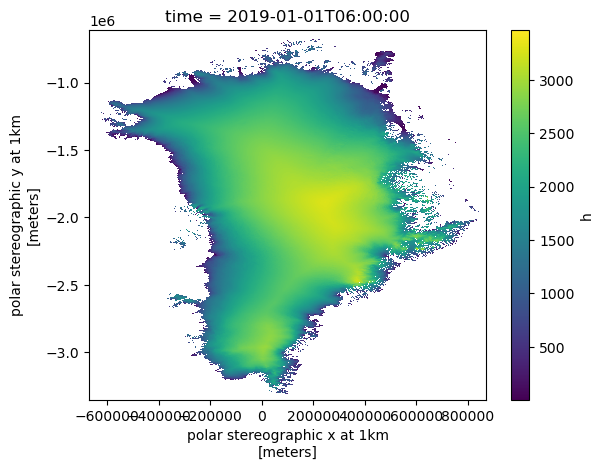

In [12]:
# Plot h variable - first time step
ATL15_GL['h'][0,:,:].plot()